In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy import integrate

In [2]:
def Likelihood(mu,n,b,s):
    
    l = mu*s + b
    
    L = np.exp( -l ) * l**n / np.math.factorial(int(n))
    
    return L

In [3]:
Likelihood(0.5,2.,2.,1.)

0.25651562069968376

In [4]:
def JointLikelihood(mu,data):
    
    N = data.shape[0]
    
    n = data[:,0]
    b = data[:,1]
    s = data[:,2]
    
    JointL = 1.
    
    for c in range(N):
        JointL *= Likelihood(mu,n[c],b[c],s[c])
        
    return JointL

In [6]:
n = np.array([0])
b = np.array([0])
s = np.array([1])

N = n.shape[0]

data = np.zeros((N,3))

data[:,0] = n
data[:,1] = b
data[:,2] = s

data

array([[0., 0., 1.]])

In [7]:
mu = np.linspace(0.,4.,100)
JointLike = JointLikelihood(mu,data)

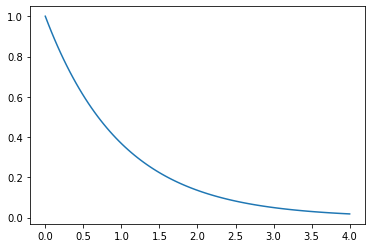

In [8]:
plt.plot(mu,JointLike)

In [10]:
Norm = integrate.quad( JointLikelihood, 0, np.inf, args=(data) )[0]
Norm

1.0000000000000002

In [11]:
JointLike = JointLike/Norm

In [12]:
#Calcular el percentile 95
mup = 0.
I = 0.
tolerancia = 1e-4

while np.abs(I - 0.95) > tolerancia:
    
    I = integrate.quad( JointLikelihood, 0.,mup, args=(data) )[0]
    
    mup += tolerancia
    
print(mup,I)

2.9939000000018936 0.9499032929202184


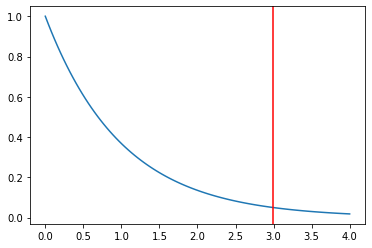

In [13]:
plt.plot(mu,JointLike)
plt.axvline(x=mup,color='r')

In [14]:
n = np.array([1])
b = np.array([0])
s = np.array([1])

N = n.shape[0]

data1 = np.zeros((N,3))

data1[:,0] = n
data1[:,1] = b
data1[:,2] = s

data1

array([[1., 0., 1.]])

In [15]:
JointLike1 = JointLikelihood(mu,data1)

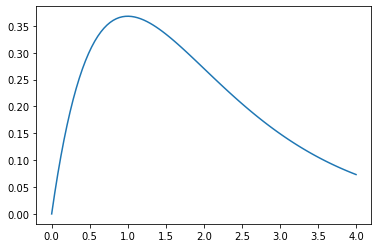

In [16]:
plt.plot(mu,JointLike1)

In [18]:
ii = np.where( JointLike1 == np.amax(JointLike1) )
muhat = mu[ii][0]
print(muhat)

1.0101010101010102


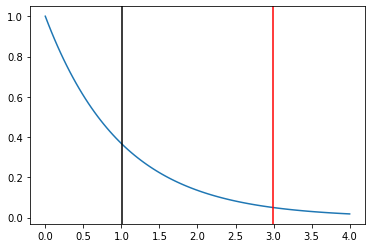

In [19]:
plt.plot(mu,JointLike)
plt.axvline(x=mup,color='r')
plt.axvline(x=muhat,color='k')

In [21]:
n = np.array([1,0])
b = np.array([0,0])
s = np.array([1,1])

N = n.shape[0]

data2 = np.zeros((N,3))

data2[:,0] = n
data2[:,1] = b
data2[:,2] = s

data2

array([[1., 0., 1.],
       [0., 0., 1.]])

In [22]:
JointLike2 = JointLikelihood(mu,data2)

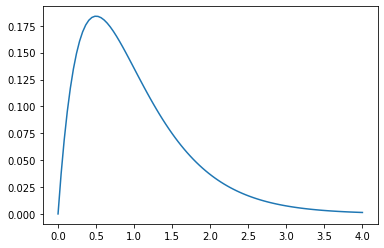

In [23]:
plt.plot(mu,JointLike2)